In [2]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from matplotlib import colors as mcolors

# Plot parameters
plt.rcParams.update({
    'lines.linewidth': 2,     # linewidth
    'text.usetex': True,      # LaTeX font
    'font.family': 'serif',   # Serif family
    'font.size': 16,          # font size
    'axes.titlesize': 18,     # title size
    'axes.grid': True,        # grid
    'grid.linestyle': "-.",   # grid style
})

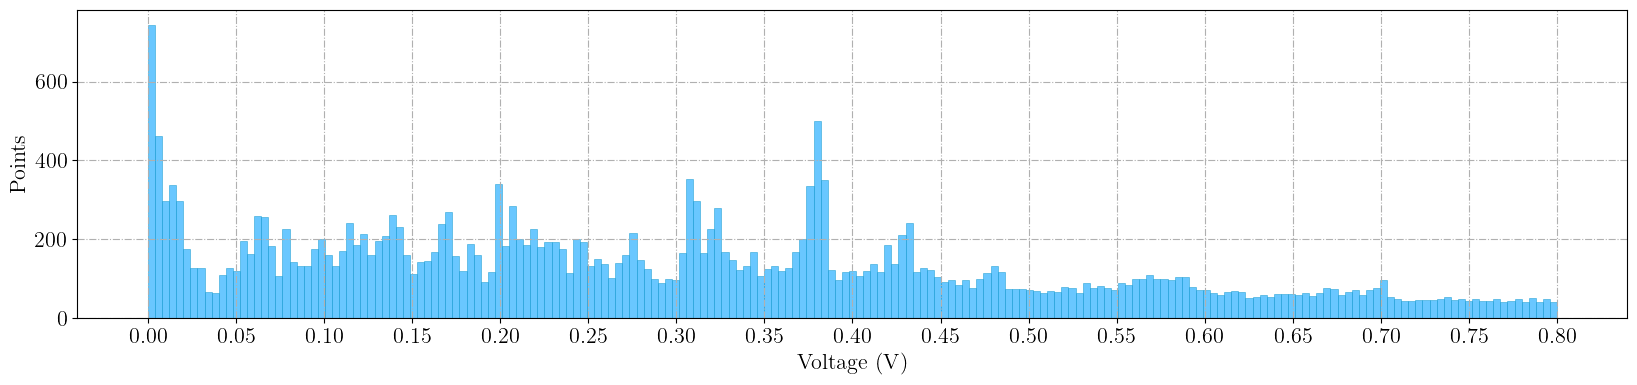

In [3]:
# We open the files
data = [ pd.read_csv(f'm{i}.csv', header = None) for i in range(1, 24) ]

# We extract the voltages
voltage_counts = pd.concat(data, ignore_index = True)

# === Histogram ===
bins = np.linspace(0, 0.8, 200)
figure = voltage_counts.set_index(3)[4].hist(bins = bins,  facecolor = '#2ab0ff', edgecolor = '#169acf', linewidth = 0.5, alpha = 0.7, figsize = (20, 4))
plt.xticks(np.arange(0, 0.805, 0.05))
plt.xlabel(r'Voltage ($\mathrm{V}$)')
plt.ylabel(r'Points')
plt.show()

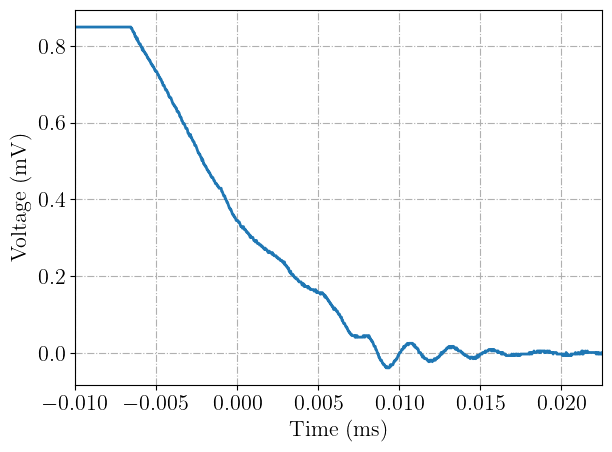

In [4]:
# Transient
data_1 = pd.read_csv(f'm6.csv', header = None)

t = data_1[3]
V = data_1[4]

plt.plot(t * 10 ** 3, V)
plt.xlim(-0.01, 0.0225)
plt.xlabel(r'Time ($\mathrm{ms}$)')
plt.ylabel(r'Voltage ($\mathrm{mV}$)')
plt.tight_layout()
plt.savefig('curve.pdf')
plt.show()

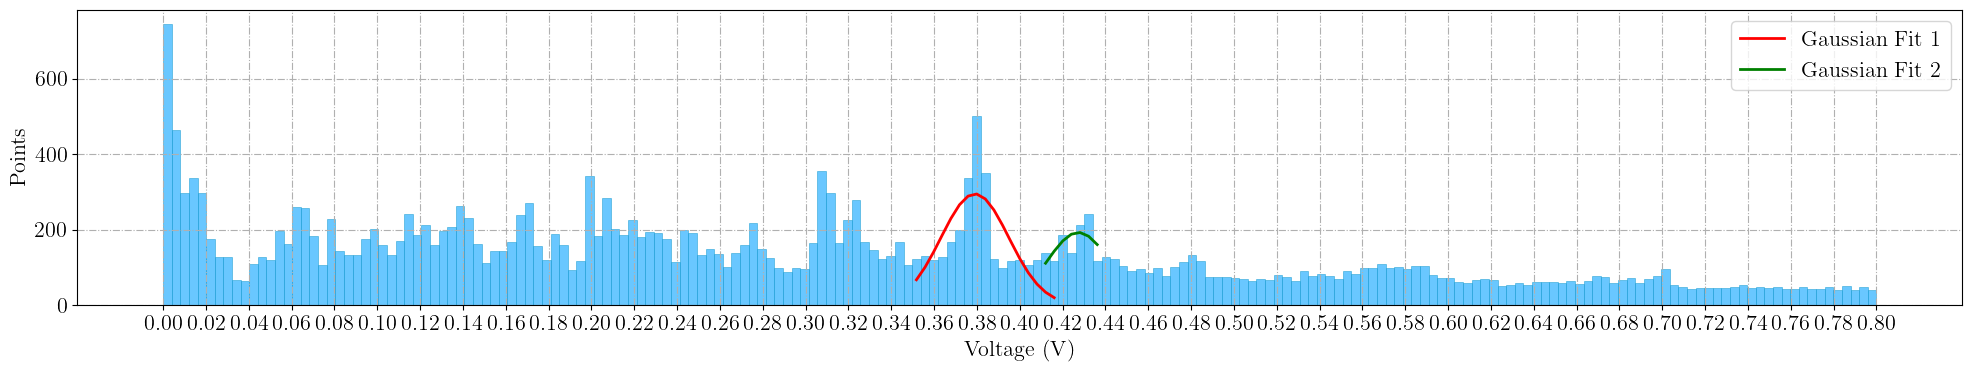

In [6]:
# Gaussian model function
def Gauss(x, sigma, mu, A):
    y = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    y = y / np.max(y)
    return A * y

# Assuming histogram data is in voltage_counts[4]
bins = np.linspace(0, 0.8, 200)
figure, ax = plt.subplots(figsize=(20, 4))

# Plot the histogram
ax.hist(voltage_counts[4], bins=bins, facecolor='#2ab0ff', edgecolor='#169acf', linewidth=0.5, alpha=0.7)

# Prepare data for fits
hist_data = np.histogram(voltage_counts[4], bins=bins)
bin_heights = hist_data[0]
bin_centers = (hist_data[1][:-1] + hist_data[1][1:]) / 2

# First Gaussian fit
gaussian_guess_1 = [0.35, 0.42]
single_gauss_df_1 = pd.DataFrame({'x': bin_centers, 'y': bin_heights}).query(f"x >= {gaussian_guess_1[0]} & x <= {gaussian_guess_1[1]}")
params_1, errors_1 = curve_fit(Gauss, single_gauss_df_1['x'], single_gauss_df_1['y'], p0=[1, np.mean(gaussian_guess_1), np.mean(single_gauss_df_1['y'])])
ax.plot(single_gauss_df_1['x'], Gauss(single_gauss_df_1['x'], *params_1), color='red', label='Gaussian Fit 1')

# Second Gaussian fit
gaussian_guess_2 = [0.41, 0.44]
single_gauss_df_2 = pd.DataFrame({'x': bin_centers, 'y': bin_heights}).query(f"x >= {gaussian_guess_2[0]} & x <= {gaussian_guess_2[1]}")
params_2, errors_2 = curve_fit(Gauss, single_gauss_df_2['x'], single_gauss_df_2['y'], p0=[1, np.mean(gaussian_guess_2), np.mean(single_gauss_df_2['y'])])
ax.plot(single_gauss_df_2['x'], Gauss(single_gauss_df_2['x'], *params_2), color='green', label='Gaussian Fit 2')

# Final plot settings
ax.set_xticks(np.arange(0, 0.805, 0.02))
ax.set_xlabel(r'Voltage ($\mathrm{V}$)')
ax.set_ylabel('Points')
ax.legend()
plt.tight_layout()
plt.savefig('histograma.pdf')
plt.show()

In [7]:
# First Gaussian fit
mu_1, sigma_1, A_1 = params_1[1], params_1[0], params_1[2]
print(f"First Gaussian fit: Mean = {mu_1}, Standard Deviation = {sigma_1}, Amplitude = {A_1}")

# Second Gaussian fit
mu_2, sigma_2, A_2 = params_2[1], params_2[0], params_2[2]
print(f"Second Gaussian fit: Mean = {mu_2}, Standard Deviation = {sigma_2}, Amplitude = {A_2}")


First Gaussian fit: Mean = 0.37906997370530227, Standard Deviation = -0.01584071757898128, Amplitude = 294.15124692116484
Second Gaussian fit: Mean = 0.42736064451232886, Standard Deviation = -0.014548953679638222, Amplitude = 192.0163146188112
